In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/43'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['3.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/43/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/43/3.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/43/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[7578, 7553, 7544, 7536, 7555, 7546, 7539, 7538, 7576, 7565, 7551, 7550, 7537, 7580, 8650, 7581, 7549, 7529, 7548, 7534, 7562, 7571, 7569, 7568, 7530, 7558, 7583, 7547, 7535, 7584, 7545, 8649, 8658, 7561, 7531, 7582, 7552, 7532, 7560, 7533, 7564, 7579, 7572, 7577, 7543, 7525, 7542, 7566, 7557, 7554, 7570, 7585, 7586, 8656, 8651, 7567, 7541, 8655, 8657, 7540, 8652, 7563, 7556, 7559]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/43/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,7578,Egypt,Uruguay
1,7553,South Korea,Mexico
2,7544,Uruguay,Saudi Arabia
3,7536,Belgium,Panama
4,7555,Poland,Colombia
...,...,...,...
59,7540,Russia,Egypt
60,8652,Russia,Croatia
61,7563,Denmark,France
62,7556,Japan,Senegal


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,9e976eaf-88bb-4fdc-813a-5ffb045dcca3,410,1,2022-11-23 00:07:53.827,7,53,15,Uruguay,4319.0,Edinson Roberto Cavani Gómez,...,Pressure,Ground Pass,97.0,32.0,119.0,37.0,7578,Egypt,Uruguay,Away
1,fc68b5d9-c8ad-4070-9955-c964ddbf0265,528,1,2022-11-23 00:11:00.680,11,0,23,Egypt,5261.0,Mahmoud Ibrahim Hassan,...,Carry,Low Pass,108.0,51.0,118.0,43.8,7578,Egypt,Uruguay,Home
2,35e5eb05-5584-4344-8522-013b20d5366d,636,1,2022-11-23 00:13:14.547,13,14,27,Uruguay,5246.0,Luis Alberto Suárez Díaz,...,Ball Receipt*,Ground Pass,109.0,55.0,120.0,46.0,7578,Egypt,Uruguay,Away
3,fa3f99fa-5678-43f1-bedb-564bb4496939,935,1,2022-11-23 00:22:27.227,22,27,46,Uruguay,4319.0,Edinson Roberto Cavani Gómez,...,Carry,High Pass,102.0,23.0,111.0,33.0,7578,Egypt,Uruguay,Away
4,70d6f4a1-59ae-4964-a873-99c323d3428e,940,1,2022-11-23 00:23:01.427,23,1,47,Uruguay,5248.0,José Martín Cáceres Silva,...,Ball Receipt*,High Pass,114.0,48.0,114.0,41.0,7578,Egypt,Uruguay,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,56f34b70-8a65-4824-ac6a-1e8649a5cf8f,3142,2,2022-11-23 00:31:09.880,76,9,136,Egypt,5253.0,Amr Medhat Warda,...,Carry,Ground Pass,102.0,22.0,112.0,36.0,7559,Saudi Arabia,Egypt,Away
1702,f47104c8-a389-4d89-bc33-f4c713b267b8,3223,2,2022-11-23 00:35:04.120,80,4,140,Saudi Arabia,5191.0,Mohammed Al Burayk,...,Tactical Shift,Ground Pass,95.0,30.0,104.0,32.0,7559,Saudi Arabia,Egypt,Home
1703,339d4217-ae76-4144-8d39-0201af518a82,3237,2,2022-11-23 00:35:57.280,80,57,141,Saudi Arabia,5187.0,Salem Mohammed Al Dawsari,...,Ball Receipt*,High Pass,116.0,30.0,119.0,36.8,7559,Saudi Arabia,Egypt,Home
1704,a6cd8160-045f-4b42-9409-e9647f6076ab,3617,2,2022-11-23 00:45:30.240,90,30,163,Saudi Arabia,5173.0,Abdullah Ibrahim Otayf,...,Carry,Ground Pass,101.0,58.0,106.0,52.0,7559,Saudi Arabia,Egypt,Home


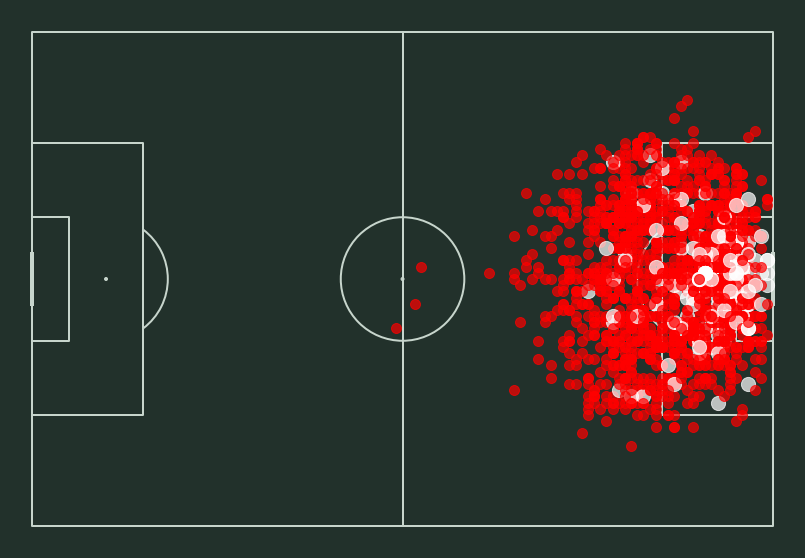

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("FWCUP.xlsx")